In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_parquet("../data/processed/oxygen_00_train_data.parquet")

In [4]:
print("🔍 Shape:", df.shape)
display(df.head())


🔍 Shape: (1594124, 8)


,lat,lon,depth,temperature_00,salinity_00,oxygen_00,nitrate_00,phosphate_00
57,-77.5,-178.5,0,-1.403,NaN,367.215,18.625,1.351
58,-77.5,-178.5,5,-1.174,NaN,368.993,18.471,1.358
59,-77.5,-178.5,10,-1.248,NaN,368.318,20.164,1.387
60,-77.5,-178.5,15,-1.273,NaN,366.832,20.064,1.364
61,-77.5,-178.5,20,-1.264,NaN,358.110,20.915,1.368


In [5]:
print("\nTypy kolumn:")
print(df.dtypes)

print("\nBraki danych (NaN):")
print(df.isna().sum())


Typy kolumn:
lat               float64
lon               float64
depth               int32
temperature_00    float64
salinity_00       float64
oxygen_00         float64
nitrate_00        float64
phosphate_00      float64
dtype: object

Braki danych (NaN):
lat                    0
lon                    0
depth                  0
temperature_00     61651
salinity_00        90927
oxygen_00              0
nitrate_00        901855
phosphate_00      694336
dtype: int64


In [6]:
display(df.describe(include=np.number).T)

,count,mean,std,min,25%,50%,75%,max
lat,1594124.0,-10.009416,41.715218,-77.500,-46.500,-15.500,22.500,89.500
lon,1594124.0,-6.354413,108.420665,-179.500,-102.500,-18.500,88.500,179.500
depth,1594124.0,412.701888,439.574806,0.000,60.000,225.000,700.000,1500.000
temperature_00,1532473.0,9.859652,8.461909,-2.149,3.174,7.320,15.297,33.633
salinity_00,1503197.0,34.724343,1.082050,2.848,34.337,34.649,35.057,39.405
oxygen_00,1594124.0,206.051244,82.280171,0.000,175.957,209.005,261.215,477.960
nitrate_00,692269.0,17.086941,13.455908,-0.082,3.693,15.361,29.616,49.980
phosphate_00,899788.0,1.280402,0.909091,0.000,0.444,1.143,2.077,11.589


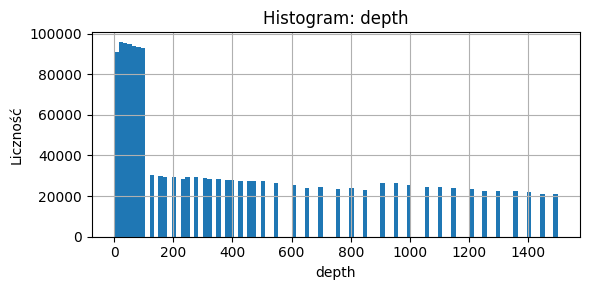

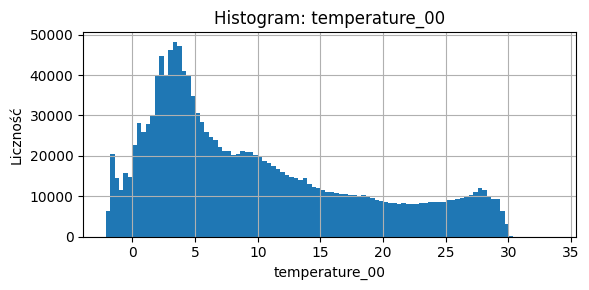

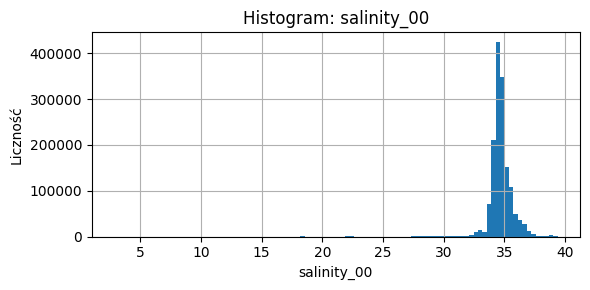

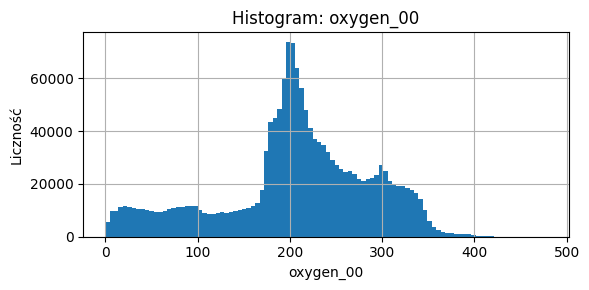

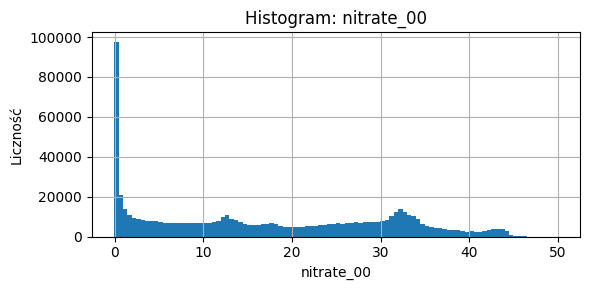

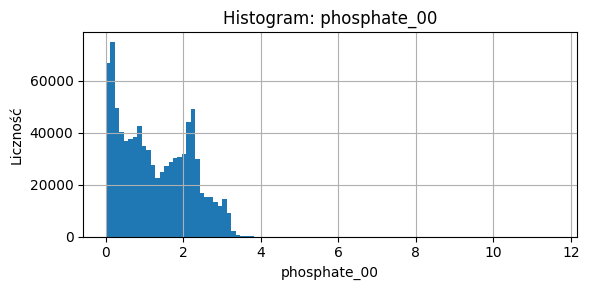

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    if col in ['lat', 'lon']: continue
    plt.figure(figsize=(6, 3))
    df[col].hist(bins=100)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Liczność")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

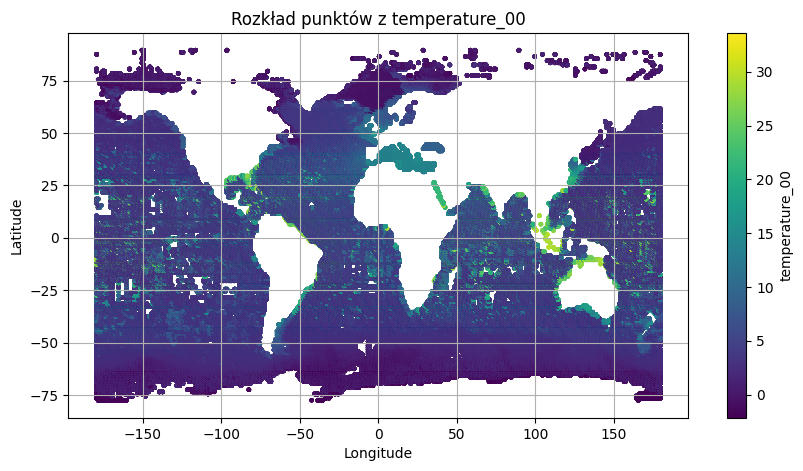

In [11]:
plt.figure(figsize=(10, 5))
subset = df.dropna(subset=["lat", "lon", "temperature_00"])
sc = plt.scatter(subset["lon"], subset["lat"], c=subset["temperature_00"], cmap="viridis", s=5)
plt.colorbar(sc, label="temperature_00")
plt.title("Rozkład punktów z temperature_00")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

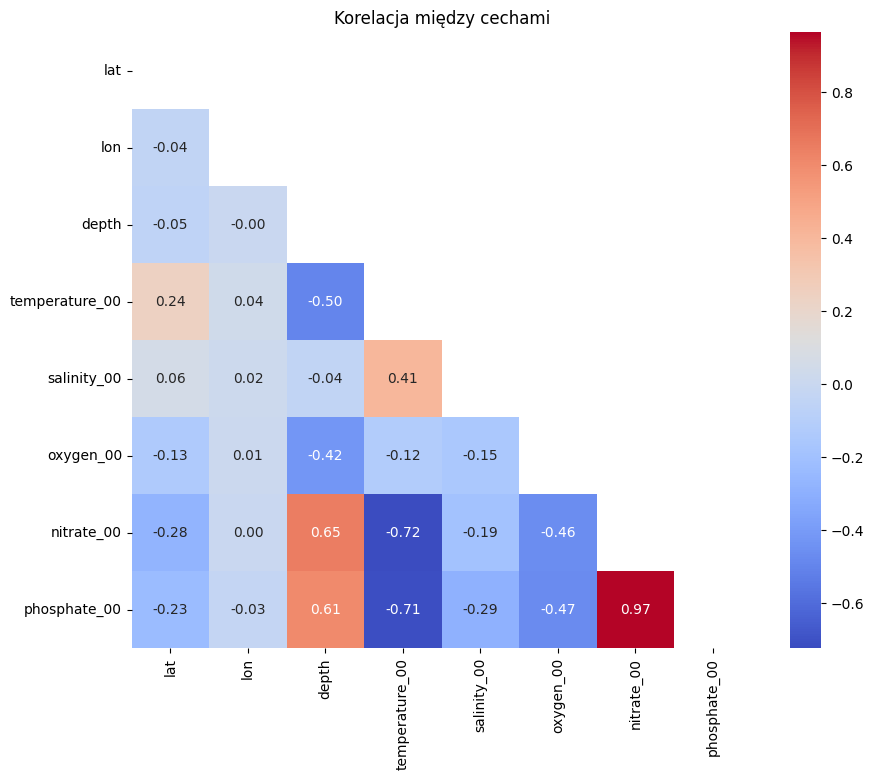

In [9]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(corr))
plt.title("Korelacja między cechami")
plt.show()

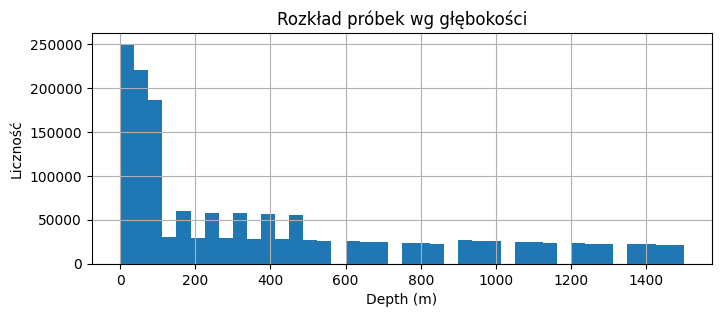

In [10]:
if "depth" in df.columns:
    plt.figure(figsize=(8, 3))
    df["depth"].hist(bins=40)
    plt.title("Rozkład próbek wg głębokości")
    plt.xlabel("Depth (m)")
    plt.ylabel("Liczność")
    plt.grid(True)
    plt.show()